# GPU and multi-threading - All About

This document briefly explains how the GPU and multi-threading is used in OSCARS.

Nearly all functions in oscars.sr accept the argument 'gpu=1' and 'gpu=0'.  If you select 1, oscars will use the gpu to do the calculation.

Nearly all functions in oscars.sr accept an argument like 'nthreads=123' where 123 is the number of threads you wish to use for a calculation.

At the moment the GPU has higher precident than threads.  This means that if you attempt to use both, the gpu will be enabled without multi-threading.

You MAY use the GPU or multi-threading with MPI, however the user should take care that the distribution of resources makes sense.

Instead of typing 'gpu=1' or 'nthreads=123' over and over again, you may use the global settings as follows:

    osr.set_gpu_global(1)
    
    osr.set_nthreads_global(123)
    
You can check if you have a gpu that oscars can see.  This will return the number of GPUs that oscars can see, or -1 if your version was not compiled with GPU support.

    osr.check_gpu()

    
## When is the GPU or multi-threading useful?

Almost always.  Even if you are calculating a single-particle spectrum, the points in the spectrum are handed to different threads (on the CPU or GPU).  If you are looking at a 2D or 3D flux or power density the different points are distributed.  There is some overhead in copying data over to the GPU, but this is almost always outweighed by the GPU performance as compared to a typical workstation.

## Problems running on the GPU?

In order for OSCARS to use your GPU the driver must be correctly installed for your operating system.  At the moment it also must be an nvidia cuda-compatible card (quite common).

In [1]:
# matplotlib plots inline
%matplotlib inline

# Import the OSCARS SR module
import oscars.sr

# Import OSCARS plots (matplotlib)
from oscars.plots_mpl import *

OSCARS v1.31.05 - Open Source Code for Advanced Radiation Simulation
Brookhaven National Laboratory, Upton NY, USA
http://oscars.bnl.gov
oscars@bnl.gov


In [2]:
# Create an OSCARS SR object
osr = oscars.sr.sr()

In [3]:
# Will return the number of GPUs available, or -1 and print an error
# If you built OSCARS yourself with setup.py it will likely not have GPU support
# builtin.  The binary versions available for download all have this builtin

osr.check_gpu()

1

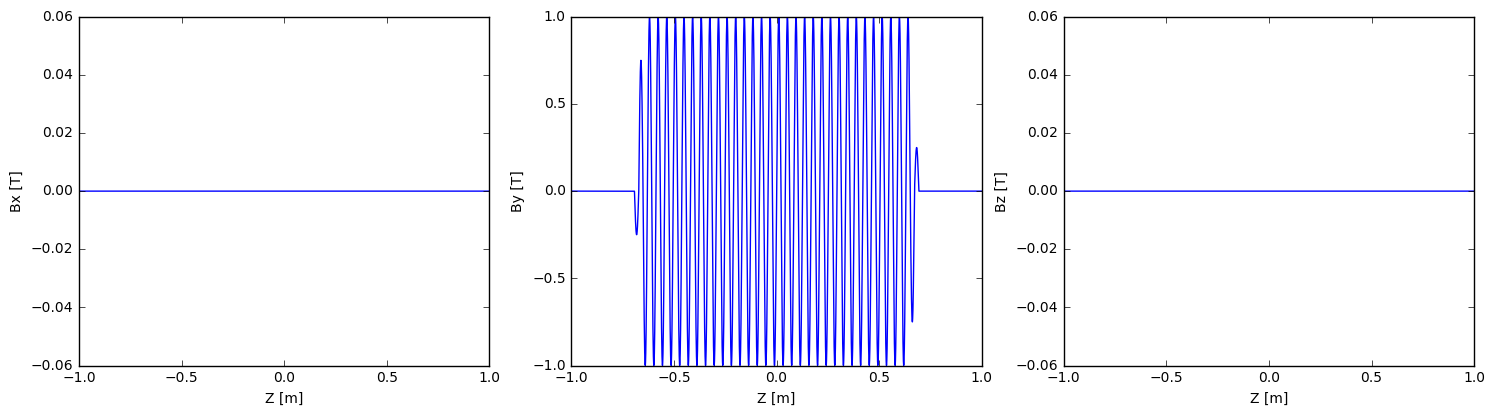

In [4]:
# For these examples we will make use of a simple undulator field
osr.add_bfield_undulator(bfield=[0, 1, 0], period=[0, 0, 0.042], nperiods=31)

# Plot the field
plot_bfield(osr)

## Beam

Add a basic beam somewhat like NSLS2.  All that is below also works for multi-particle simulations

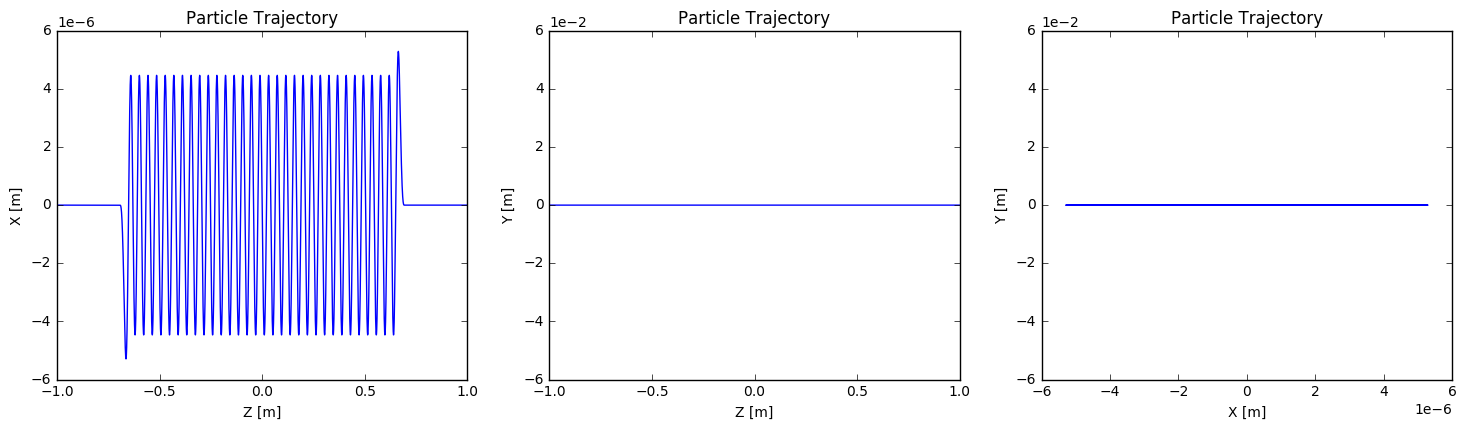

In [5]:
# Add a basic electron beam with zero emittance
osr.set_particle_beam(type='electron',
                      name='beam_0',
                      energy_GeV=3,
                      x0=[0, 0, -1],
                      d0=[0, 0, 1],
                      current=0.500)

# You MUST set the start and stop time for the calculation
osr.set_ctstartstop(0, 2)

# Plot trajectory of beam
osr.set_new_particle()
plot_trajectory_position(osr.calculate_trajectory())

## Spectrum

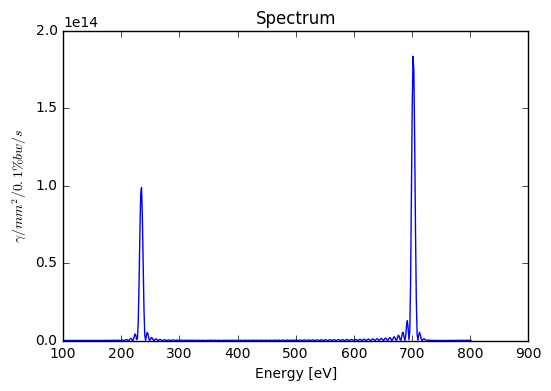

In [6]:
# Use multi-threading
spectrum = osr.calculate_spectrum(obs=[0, 0, 30], energy_range_eV=[100, 800], npoints=500, nthreads=8)
plot_spectrum(spectrum)

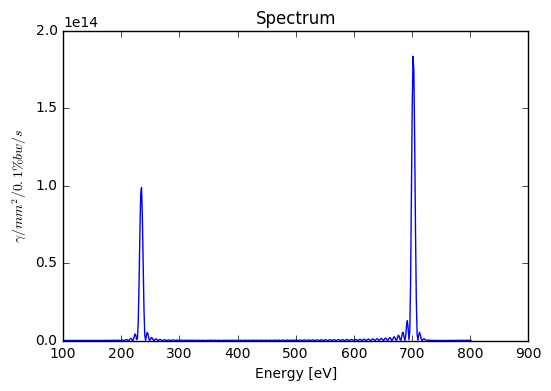

In [7]:
# Use the GPU
spectrum = osr.calculate_spectrum(obs=[0, 0, 30], energy_range_eV=[100, 800], npoints=500, gpu=1)
plot_spectrum(spectrum)

## Flux

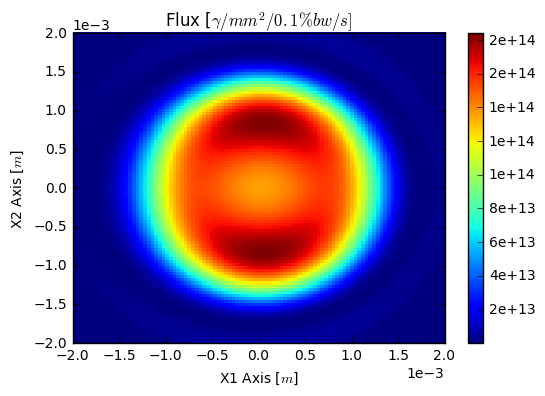

In [8]:
# Use multi-threading
flux = osr.calculate_flux_rectangle(plane='XY',
                                    energy_eV=700,
                                    width=[0.004, 0.004],
                                    npoints=[101, 101],
                                    translation=[0, 0, 30],
                                    nthreads=8)
plot_flux(flux)

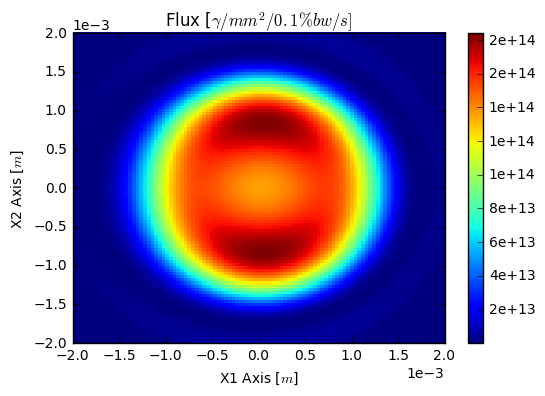

In [9]:
# Use the GPU
flux = osr.calculate_flux_rectangle(plane='XY',
                                    energy_eV=700,
                                    width=[0.004, 0.004],
                                    npoints=[101, 101],
                                    translation=[0, 0, 30],
                                    gpu=1)
plot_flux(flux)

## Power Density

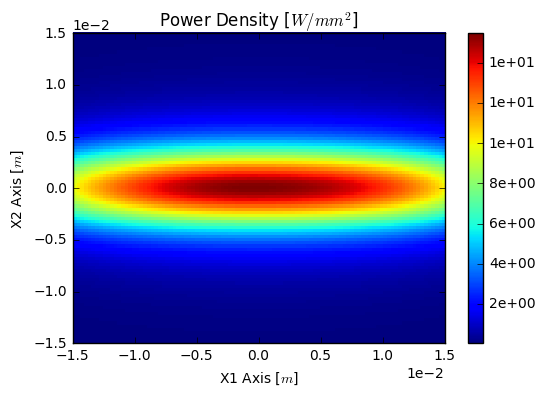

In [10]:
# Use multi-threading
power_density = osr.calculate_power_density_rectangle(plane='XY',
                                                      width=[0.03, 0.03],
                                                      npoints=[101, 101],
                                                      translation=[0, 0, 30],
                                                      nthreads=8)
plot_power_density(power_density)

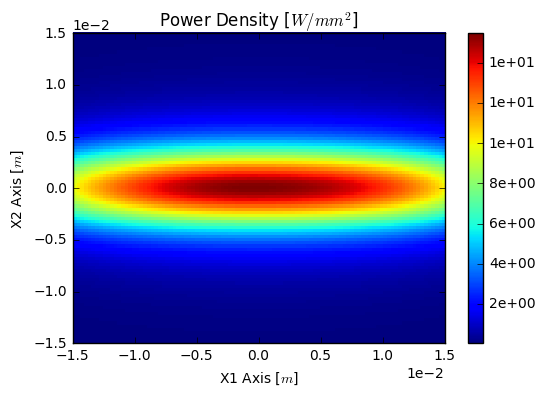

In [11]:
# Use the GPU
power_density = osr.calculate_power_density_rectangle(plane='XY',
                                                      width=[0.03, 0.03],
                                                      npoints=[101, 101],
                                                      translation=[0, 0, 30],
                                                      gpu=1)
plot_power_density(power_density)

In [13]:
# If you want to convert the notebook to HTML
import os
os.system('jupyter nbconvert --to html AllAbout_GPUAndThreads.ipynb')

0